# Logistic regression
[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is a classification algorithm. It is based on the sigmoid function

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

where $x \in (-\infty, \infty)$ and $\sigma \in [0, 1]$

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)

numpy version: 1.23.1
pandas version: 1.4.3


We define the sigmoid function

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

We compute a sample of the sigmoid function within a predefined interval

In [6]:
x = np.linspace(-10, 10, 100) # start = -10, stop = 10, samples = 100
sigma = sigmoid(x)

Finally we plot the sigmoid function

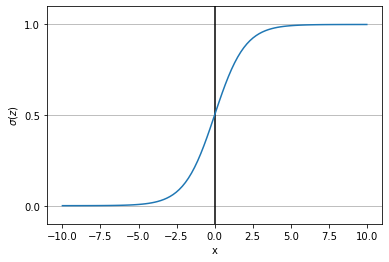

In [4]:
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('$\sigma (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.plot(x, sigma)

The sigmoid is used as the activation function in logistic regression. The difference compared to the perceptron is that the sigmoid is differentiable everywhere while the threshold function, used as the perceptron's activation function, is not. The idea in logistic regression is to use the output of the sigmoid actvation function to determine the class of the input

$$y = \Biggl\{  \begin{matrix} 1 & \sigma(x, w) > 0.5 \\ 0 & otherwise \end{matrix}$$

where x represents the input and w represents the parameters that have to be learnt from a training data set

$$\sigma(x, w) = \frac{1}{1 + e^{-wx}}$$

The model can learn the layer parameters w by minimizing a cost function


$$J(w) = \sum_{i = 1}^N (\sigma(x_i, w) - y_i)^2$$

## Binomial distribution
The binomial distribution is a discrete distribution and represents the probability of k successes out of n trials when the chance for each trial is p. It is given by the Bernoulli distribution $p^k (1 - p)^{(1 - k)}$ times the number of ways in which k successes can be obtained in n trials   
$$Bin(n, p) = \binom{n}{k} p^k (1 - p)^{(1 - k)} $$
where
$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

In [128]:
from scipy.stats import binom
p = 0.5
n = 10
a = binom.ppf(0.01, n, p)
b = binom.ppf(0.99, n, p)
trials = np.arange(a, b)
prob_success = binom(n, p).pmf(trials)

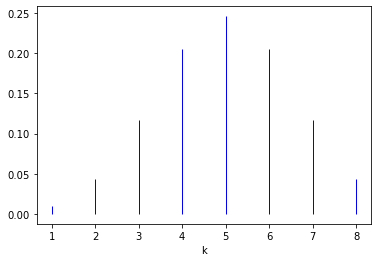

In [130]:
fig, ax = plt.subplots(1, 1)
ax.vlines(trials, 0, prob_success, colors='blue', linestyles='-', lw=1)
ax.set_xlabel('k')
plt.show()